# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay, mean_squared_error, r2_score
from mlxtend.plotting import plot_decision_regions

# Load the diabetes dataset from CSV file

In [2]:
diabetes = pd.read_csv("diabetes.csv")

# Use all features except the last one (the target)

In [3]:
X = diabetes.iloc[:, :-1]

# Split the data into training/testing sets

In [4]:
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets

In [5]:
y = diabetes.iloc[:, -1] # the last column is the target

In [6]:
y_train = y[:-20]
y_test = y[-20:]

# Create a multiple linear regression object

In [7]:
mlr = LinearRegression()

# Train the model using the training sets

In [8]:
mlr.fit(X_train, y_train)

LinearRegression()

# Make predictions using the testing set

In [9]:
y_pred = mlr.predict(X_test)

# The coefficients

In [10]:
print('Coefficients: \n', mlr.coef_)

Coefficients: 
 [ 0.02239148  0.00581077 -0.00232574  0.00052319 -0.00019097  0.01298855
  0.14092583  0.00220817]


# The mean squared error

In [11]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

Mean squared error: 0.14


# The coefficient of determination: 1 is perfect prediction

In [12]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficient of determination: 0.44


# Plot outputs

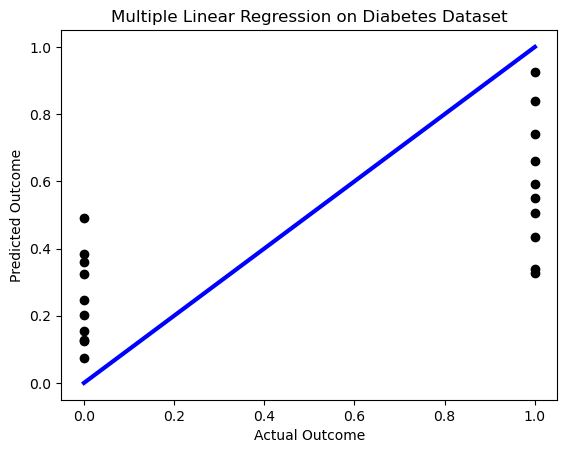

In [13]:
plt.scatter(y_test, y_pred,  color='black')
plt.plot([0, 1], [0, 1], color='blue', linewidth=3)

plt.xlabel('Actual Outcome') # set the x-axis label
plt.ylabel('Predicted Outcome') # set the y-axis label
plt.title('Multiple Linear Regression on Diabetes Dataset') # set the plot title
plt.show()

# Create a MLP classifier object

In [14]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

# Train the model using the training sets

In [15]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

# Make predictions using the testing set

In [16]:
y_pred = mlp.predict(X_test)

# The confusion matrix

In [17]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: \n', cm)

Confusion matrix: 
 [[8 2]
 [6 4]]


# Plot the confusion matrix

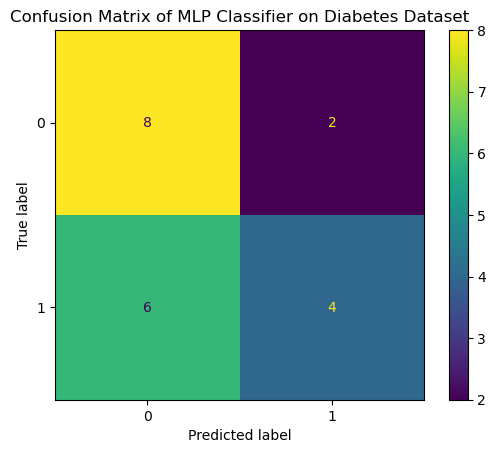

In [18]:
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix of MLP Classifier on Diabetes Dataset')
plt.show()

# The ROC curve and AUC

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('ROC AUC: %.2f' % roc_auc)

ROC AUC: 0.60


# Plot the ROC curve

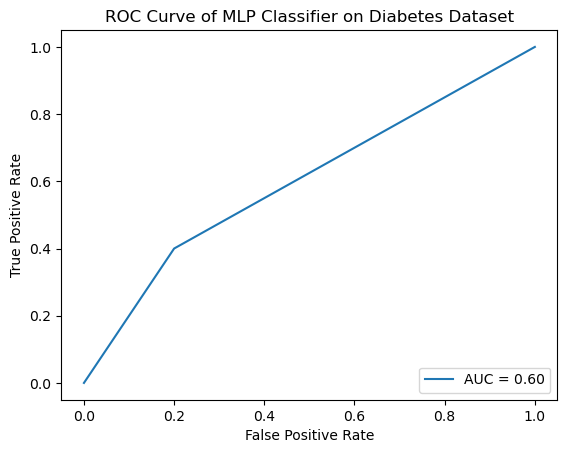

In [20]:
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title('ROC Curve of MLP Classifier on Diabetes Dataset')
plt.show()

In [21]:
# Select two features for visualization

In [22]:
X_vis = X[['BMI', 'Glucose']].values

In [23]:
# Train the model using the selected features from the training set

In [24]:
mlp.fit(X_train[['BMI', 'Glucose']], y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

# Plot the decision regions

C:\Users\Jinius\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


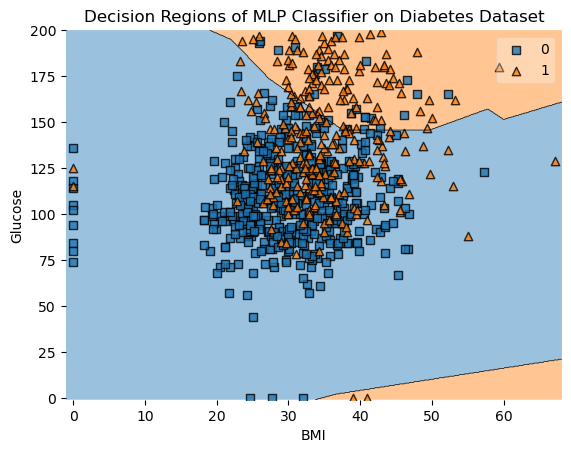

In [25]:
plot_decision_regions(X=X_vis, y=y.values, clf=mlp)
plt.xlabel('BMI') # set the x-axis label
plt.ylabel('Glucose') # set the y-axis label
plt.title('Decision Regions of MLP Classifier on Diabetes Dataset') # set the plot title
plt.show()